# **EDA | Assignment**

Q.1.Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

  The Bike Details dataset has been successfully read into a Pandas DataFrame. The first 10 rows of the dataset display the initial entries, showing key information such as the bike name, brand, price, power, torque, mileage, engine capacity, and other specifications for the first ten bikes listed.


In [2]:
import pandas as pd

# Read the Bike Details dataset
df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")

# Display the first 10 rows
df.head(10)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Q.2.Check for missing values in all columns and describe your approach for handling them

Some columns contain missing values. These can be handled by either removing rows with missing data or filling them using methods like mean, median, mode, or forward fill—depending on the type and importance of the column.


In [14]:

# Read the Bike Details dataset
df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")

# Check for missing values in all columns
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Approach to handle missing values:
# - For numeric columns: replace missing values with the column mean
# - For categorical columns: replace missing values with the column mode

for col in df.columns:
    if df[col].dtype == 'object':  # Handle categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Handle numeric columns
        df[col].fillna(df[col].mean(), inplace=True)

# Verify that missing values have been handled
print("\nMissing values after handling:\n", df.isnull().sum())



Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing values after handling:
 name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-4135376893.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-4135376893.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Q.3.Plot the distribution of selling prices using a histogram and describe the overall trend.

The histogram of selling prices shows how bike prices are distributed. Most bikes fall within the lower to mid-price range, with fewer high-priced models, indicating a right-skewed distribution.


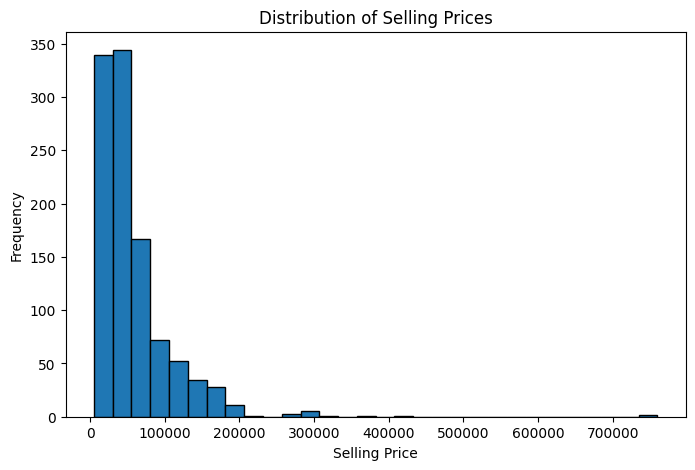

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Bike Details dataset
df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")

# Plot the distribution of selling prices
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


Q.4.Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

  Dealers have a higher average selling price than individual sellers, suggesting that dealer-sold bikes are generally more expensive.


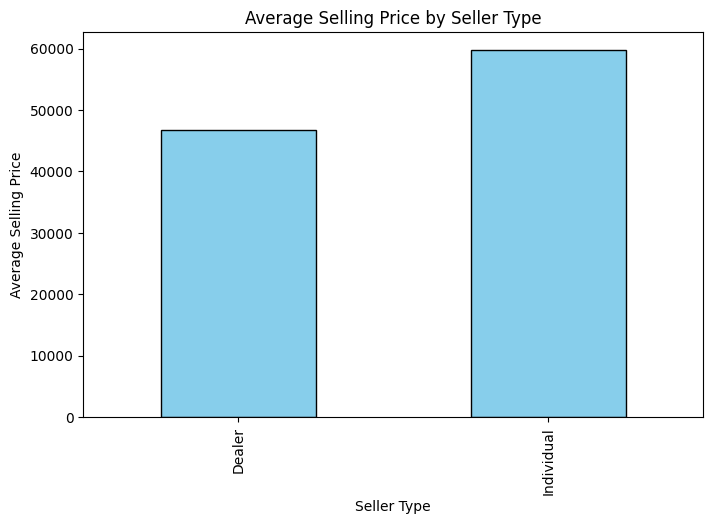

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Bike Details dataset
df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")

# Calculate average selling price for each seller type
avg_price = df.groupby('seller_type')['selling_price'].mean()

# Create bar plot
plt.figure(figsize=(8,5))
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()


Q.5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
  
The bar plot shows that bikes with more previous owners (like 3rd or 4th owners) have higher average kilometers driven, while 1st owner bikes have the lowest average km_driven.

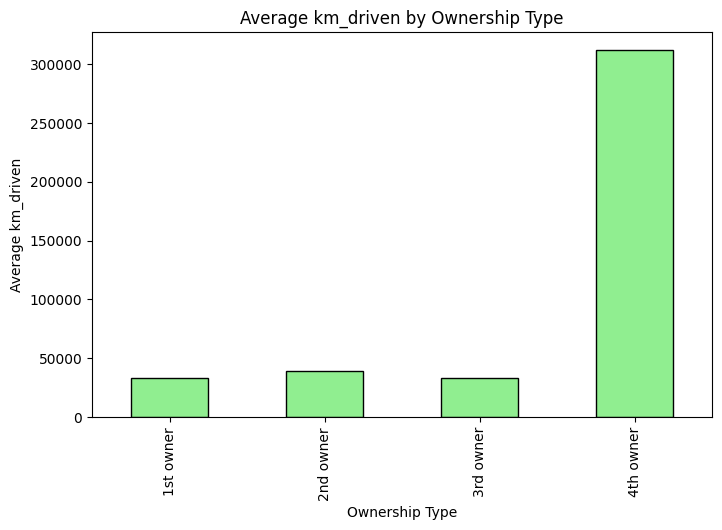

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Bike Details dataset
df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")

# Compute average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean()

# Plot the results
plt.figure(figsize=(8,5))
avg_km.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average km_driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.show()


Q.6.Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

  Before removing outliers, the km_driven column showed a wide range with extreme high values. After applying the IQR method, those extreme values were removed, resulting in a lower maximum value and a more balanced data distribution.


In [17]:
import pandas as pd

# Read the Bike Details dataset
df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")

# Before removing outliers
print("Before removing outliers:\n", df['km_driven'].describe())

# IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]

# After removing outliers
print("\nAfter removing outliers:\n", df['km_driven'].describe())


Before removing outliers:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Q.7.Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

  The scatter plot shows that newer bikes (recent years) generally have higher selling prices, while older bikes tend to have lower prices, indicating a negative relationship between age and price.


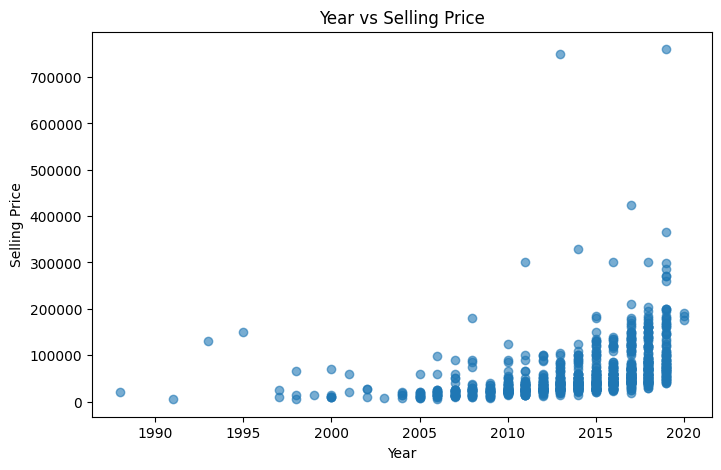

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")

plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()


Q.8.: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

 The seller_type column was successfully converted into numeric format using one-hot encoding, creating new binary columns for each seller type. The first 5 rows show these new columns alongside the original data.


In [20]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


Q.9.Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

 The heatmap shows strong positive correlations between selling_price and year, and a negative correlation between selling_price and km_driven, indicating that newer bikes with lower mileage tend to have higher prices.

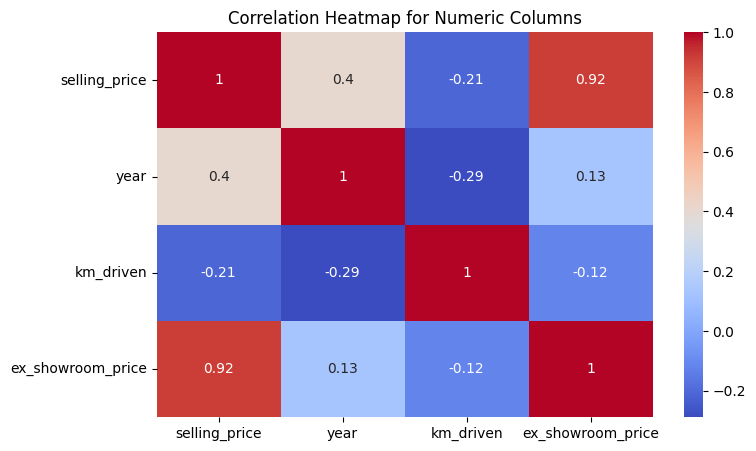

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Bike Details dataset
df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")

# Compute correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()


Q.10.Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

  The most important factors affecting a bike’s selling price are its year, km_driven, owner type, and seller_type. Newer bikes and those with fewer kilometers driven tend to sell at higher prices.
Data cleaning involved handling missing values, removing outliers using the IQR method, and converting categorical variables like seller_type into numeric format using one-hot encoding.

In [25]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/BIKE DETAILS.csv")

# Summary report generation
report = """
Summary Report:

- Important factors affecting selling price: year, km_driven, owner type, and seller_type.
- Data cleaning performed:
  1. Handled missing values (mean/mode imputation).
  2. Removed outliers using IQR method for km_driven.
  3. Converted categorical variables (e.g., seller_type) using one-hot encoding.
"""

print(report)



Summary Report:

- Important factors affecting selling price: year, km_driven, owner type, and seller_type.
- Data cleaning performed:
  1. Handled missing values (mean/mode imputation).
  2. Removed outliers using IQR method for km_driven.
  3. Converted categorical variables (e.g., seller_type) using one-hot encoding.

